# import necessary libraries

In [3]:
import os
from matplotlib import pyplot as plt
%matplotlib inline


from Test_testing import *

# Pass Image location as argument to predict Class and Attributes

In [4]:
# predict_only_attributes('/media/chintu/bharath_ext_hdd/Bharath/Attribute Classifier/ML-GCN-master/data/test/new_images')

In [6]:
predict('/media/chintu/bharath_ext_hdd/Bharath/Attribute Classifier/ML-GCN_redefined/data/test/masked')

===== Use CPU to Test! =====

/media/chintu/bharath_ext_hdd/Bharath/Attribute Classifier/ML-GCN_redefined/data/test/masked
=> loaded checkpoint (epoch 10) with best_score: 15.943273544311523

Pre-trained G model is loaded.

===> Loaded datasets

Evaluating....


In [12]:
import os
import torch
from torch.autograd import Variable
from torch.utils.data import DataLoader
import torchvision.transforms as transforms

from engine import *
from models import *
from util import *
from iMat2020 import *



In [14]:
model_loc = './checkpoint/coco/checkpoint.pth.tar'
num_classes=340
image_size=448

# Model
model = gcn_resnet101(num_classes=num_classes, t=0.4, adj_file='./data/iMat/iMat_corr_matrix.pkl')
pretained_model = torch.load(model_loc, map_location=lambda storage, loc: storage)


# optionally resume from a checkpoint

checkpoint = torch.load(model_loc)
start_epoch = checkpoint['epoch']
best_score = checkpoint['best_score']

try:
    model.load_state_dict(checkpoint['state_dict'])
    print("try model loaded")

except:
    state_dict =checkpoint['state_dict']
    from collections import OrderedDict
    new_state_dict = OrderedDict()

    for k, v in state_dict.items():
        if 'module' not in k:
            k = 'module.'+k
        else:
            k = k.replace('features.module.', 'module.features.')
        new_state_dict[k]=v

    model.load_state_dict(new_state_dict)
    print("finally model loaded")

print("=> loaded checkpoint (epoch {}) with best_score: {}\n".format(checkpoint['epoch'], best_score))
normalize = transforms.Normalize(mean=model.image_normalization_mean,
                                    std=model.image_normalization_std)

test_transform = transforms.Compose([Warp(image_size),
                                    transforms.ToTensor(),normalize,])
model = model.cuda()

model = torch.nn.DataParallel(model, device_ids=[0]).cuda()

try model loaded
=> loaded checkpoint (epoch 10) with best_score: 15.943273544311523



In [16]:
vectors= pickle.load(open('data/iMat/iMat_glove_word2vec.pkl','rb'))
import torchvision.transforms as transforms
trans = transforms.ToTensor()
vectors = trans(vectors)

# test_dataset.transform = test_transform   
import json
with open ('data/iMat/category.json') as f:
    attributes= json.load(f)
attributes = { v:k for k,v in attributes.items()}

(138, 188)
torch.Size([1, 4, 448, 448])


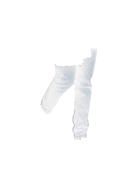

In [17]:
img_path = 'data/test/masked/1eb228db16bb5e0533d86de07a49a811_6_pant.png'
img = Image.open(img_path)
print(img.size)
img = test_transform(img).unsqueeze(0)
print(img.shape)
from IPython.display import Image as IM
display(IM(img_path, width=150))

In [18]:
feature_var = torch.autograd.Variable(img).float()
inp_var = torch.autograd.Variable(vectors).float().detach()

In [22]:
model.eval()
with torch.no_grad():
    prediction,x1,x2 = model(feature_var, inp_var)

prediction = prediction.to(torch.device('cpu'))
print(prediction)
prediction[prediction<0]=0
prediction[prediction>0]=1

tensor([[ -6.0214,  -5.6050,  -7.7800,  -6.5362,  -4.4707,  -7.2196,   2.1100,
          -5.7026, -10.6640,  -8.0556,  -7.7625,  -5.9252, -10.0335,  -5.7128,
         -12.0671,  -7.0847,  -5.8205,  -7.5841,  -8.5555,  -4.9994,  -7.7383,
         -10.0406,  -9.0145,  -6.3235,  -8.5237,  -8.4558,  -9.5443,  -8.5509,
          -6.5382,  -9.0463, -12.5585,  -7.5732,  -8.6996,  -7.5503,  -9.4531,
          -9.1287,  -9.4673,  -9.0948, -10.0929, -12.2079,  -8.6509,  -9.8813,
          -9.3609,  -7.8414, -10.7949, -14.6288,  -6.8651, -10.2673,  -8.1826,
          -8.4564,  -9.5260,  -8.1484,  -9.1389,  -9.8872,  -7.1845, -10.5467,
         -10.3512,  -8.5094,  -9.7685,  -7.6754,  -9.9925, -11.9864,  -7.0050,
          -5.9158,  -9.2727,  -8.4058,  -6.0829,  -6.0972,  -7.7253, -16.2119,
          -9.5703,  -8.5413,  -9.7250,  -7.2182,  -9.2671,  -7.1869,  -9.1653,
          -7.9954, -15.0925,  -7.0517,  -8.9557,  -8.6792,   1.0136,  -5.6514,
          -3.0429,  -1.8007,  -6.8427,  -5.4511,  -6

In [23]:
prediction.sum(), len(x1[0]), len(x2)

(tensor(11.), 2048, 340)

In [24]:
for i, p in enumerate(prediction.squeeze()):
    if p ==1:
        print(attributes[i])

pants
jeans
symmetrical
regular (fit)
normal waist
maxi (length)
fly (opening)
no non-textile material
washed
no special manufacturing technique
plain (pattern)
